In [2]:
import sys, os, json, subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
import cbm3_python_helper
cbm3_python_helper.load_cbm3_python()
from cbm3_python.cbm3data import cbm3_results
from cbm3_python.cbm3data import results_queries

In [4]:
results_db_path = r".\tutorial1\tutorial1_results.mdb"

## Pool Indicators ##

In [36]:
pool_indicators = cbm3_results.load_pool_indicators(
    results_db_path,
    land_class_grouping=True)
pool_indicators.head()

,TimeStep,LandClassID,kf2,kf3,kf4,kf5,kf6,Aboveground Very Fast DOM,Belowground Very Fast DOM,Aboveground Fast DOM,...,Total Biomass,Aboveground Biomass,Belowground Biomass,Total Ecosystem,Dead Organic Matter,Aboveground DOM,Belowground DOM,Deadwood,Litter,Soil C
0,0,1,0,1990,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2040.000000,2040.000000,0.000000,2040.000000,0.000000,0.000000,4080.000000
1,1,6,1,1990,1990,0,0,0.063734,0.011785,0.000720,...,1.552654,1.270584,0.282070,2034.903942,2033.351288,0.069608,2033.281708,0.002031,0.068297,4066.550171
2,2,6,1,1990,1990,0,0,0.385433,0.075362,0.008057,...,7.451983,6.098186,1.353797,2034.531725,2027.079742,0.431708,2026.648132,0.015928,0.420605,4053.211304
3,3,6,1,1990,1990,0,0,1.128742,0.242515,0.051575,...,18.636180,15.250556,3.385623,2040.127940,2021.491760,1.325711,2020.166077,0.066153,1.276020,4040.056763
4,4,6,1,1990,1990,0,0,2.362402,0.553779,0.176826,...,35.673191,29.192463,6.480727,2052.495426,2016.822235,2.925186,2013.897095,0.185773,2.779546,4027.160034


In [34]:
stock_changes = cbm3_results.load_stock_changes(results_db_path)#, land_class_grouping=True)
stock_changes.head()


,TimeStep,Delta Total Ecosystem,Delta Total Biomass,Delta Total DOM,Net Primary Productivity (NPP),Net Ecosystem Productivity (NEP),Net Growth,Net Litterfall,Total Litterfall,Decomposition Releases,...,Total CH4 Emissions,Bio CO2 Emissions,Bio CO Emissions,Bio CH4 Emissions,DOM CO2 Emissions,DOM CO Emissions,DOM CH4 Emissions,Disturbance Losses,Bio To Soil from Disturbances,Net Biome Productivity (NBP)
0,1,-5.095932,1.552654,-5.202875,1.659596,-5.095932,1.552654,-6.648560,0.106942,6.755529,...,0.0,0.0,0.0,0.0,6.755528,0.0,0.0,0.0,0.0,-5.095932
1,2,-0.372336,5.899329,-0.955454,6.482447,-0.372336,5.899329,-6.271706,0.583118,6.854783,...,0.0,0.0,0.0,0.0,6.854783,0.0,0.0,0.0,0.0,-0.372336
2,3,5.596232,11.184196,4.056581,12.723847,5.596232,11.184196,-5.588150,1.539651,7.127616,...,0.0,0.0,0.0,0.0,7.127616,0.0,0.0,0.0,0.0,5.596232
3,4,12.367373,17.037011,9.416790,19.987594,12.367373,17.037011,-4.669571,2.950583,7.620221,...,0.0,0.0,0.0,0.0,7.620221,0.0,0.0,0.0,0.0,12.367373
4,5,19.747507,23.286242,14.918107,28.115642,19.747507,23.286242,-3.538742,4.829400,8.368135,...,0.0,0.0,0.0,0.0,8.368135,0.0,0.0,0.0,0.0,19.747507


In [28]:
area_indicators = cbm3_results.load_age_indicators(results_db_path, land_class_grouping=True)
area_indicators.head()

,TimeStep,LandClassID,kf2,kf3,kf4,kf5,kf6,Area,Biomass,DOM,Average Age
0,0,1,0,1990,0,0,0,30.0,0.000000,204.000000,0.0
1,1,6,1,1990,1990,0,0,30.0,0.155265,203.335144,1.0
2,2,6,1,1990,1990,0,0,30.0,0.745198,202.707989,2.0
3,3,6,1,1990,1990,0,0,30.0,1.863618,202.149189,3.0
4,4,6,1,1990,1990,0,0,30.0,3.567319,201.682217,4.0


In [37]:
dist_indicators = cbm3_results.load_disturbance_indicators(
    results_db_path, 
    land_class_grouping=True, 
    disturbance_type_grouping=True)

dist_indicators.head()


,TimeStep,DistTypeID,LandClassID,kf2,kf3,kf4,kf5,kf6,Area,Product
0,1,0,6,1,1990,1990,0,0,30.0,0.0
1,1,1,6,1,1990,1990,0,0,30.0,0.0
2,2,0,6,1,1990,1990,0,0,30.0,0.0
3,3,0,6,1,1990,1990,0,0,30.0,0.0
4,4,0,6,1,1990,1990,0,0,30.0,0.0


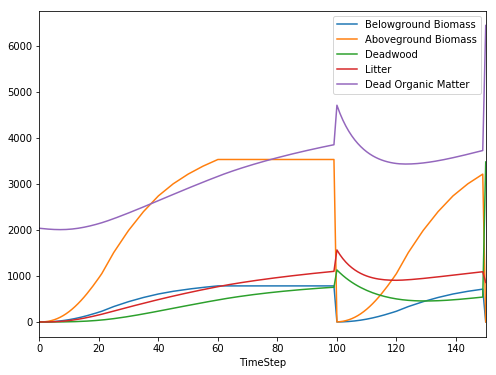

In [38]:
stocks_cols = ["TimeStep", 
               "Belowground Biomass", 
               "Aboveground Biomass", 
               "Deadwood", 
               "Litter", 
               "Dead Organic Matter"]
#stocks = pool_indicators.loc[pool_indicators["LandClassID"]==0][stocks_cols].groupby("TimeStep").sum()
stocks = pool_indicators[stocks_cols].groupby("TimeStep").sum()
stocks.plot(figsize=(8,6))



In [39]:
stocks.head()

,Belowground Biomass,Aboveground Biomass,Deadwood,Litter,Dead Organic Matter
TimeStep,,,,,
0,0.000000,0.000000,0.000000,0.000000,2040.000000
1,0.282070,1.270584,0.002031,0.068297,2033.351288
2,1.353797,6.098186,0.015928,0.420605,2027.079742
3,3.385623,15.250556,0.066153,1.276020,2021.491760
4,6.480727,29.192463,0.185773,2.779546,2016.822235


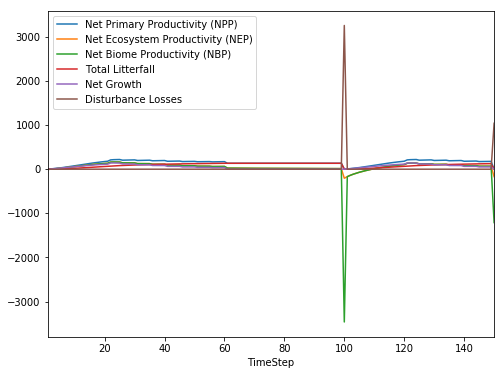

In [40]:
#flux_indicators
flux_cols = ["TimeStep", 
             "Net Primary Productivity (NPP)",
             "Net Ecosystem Productivity (NEP)",
             "Net Biome Productivity (NBP)",
             "Total Litterfall",
             "Net Growth",
            "Disturbance Losses"]
flux = flux_indicators[flux_cols].groupby("TimeStep").sum()
flux.plot(figsize=(8,6))

In [41]:
flux.head()

,Net Primary Productivity (NPP),Net Ecosystem Productivity (NEP),Net Biome Productivity (NBP),Total Litterfall,Net Growth,Disturbance Losses
TimeStep,,,,,,
1,1.659596,-5.095932,-5.095932,0.106942,1.552654,0.0
2,6.482447,-0.372336,-0.372336,0.583118,5.899329,0.0
3,12.723847,5.596232,5.596232,1.539651,11.184196,0.0
4,19.987594,12.367373,12.367373,2.950583,17.037011,0.0
5,28.115642,19.747507,19.747507,4.829400,23.286242,0.0


In [42]:

print(results_queries.get_disturbance_indicators_view_sql(
        True, False,
        False, True))

SELECT 
tdi.TimeStep,tdi.DistTypeID,tdi.LandClassID,tdi.kf2,tdi.kf3,tdi.kf4,tdi.kf5,tdi.kf6,
sum(tdi.DistArea) as [Area],
sum(tdi.DistProduct) as [Product]
from tblDistindicators tdi
group by tdi.TimeStep,tdi.DistTypeID,tdi.LandClassID,tdi.kf2,tdi.kf3,tdi.kf4,tdi.kf5,tdi.kf6
order by tdi.TimeStep,tdi.DistTypeID,tdi.LandClassID,tdi.kf2,tdi.kf3,tdi.kf4,tdi.kf5,tdi.kf6


In [43]:
a =area_indicators[["TimeStep","Area","LandClassID"]]
pivoted = cbm3_results.pivot(a , "TimeStep","LandClassID" )

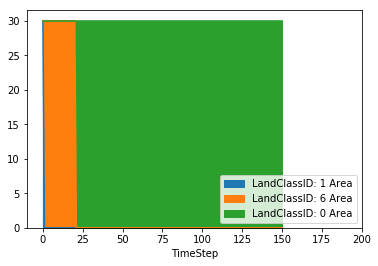

In [44]:
pivoted.fillna(0).plot(kind='area', xlim=(-10,200))#, style=['-*','.-','-^'])
